# Dataset: Email marketing campaign 
### The probability that a user clicks on an email 
### Probability that a user converts, given they clicked 
### Conditional probability tables and visualisation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(42)

In [4]:
df = pd.DataFrame({
    "Email_Sent": 1,
    "Opened": np.random.choice([0, 1], size=1000, p=[0.4, 0.6]),
    "Clicked": np.random.choice([0, 1], size=1000, p=[0.7, 0.3]),
    "Converted": np.random.choice([0, 1], size=1000, p=[0.85, 0.15])
})

In [5]:
df.head()

,Email_Sent,Opened,Clicked,Converted
0,1,1,0,0
1,1,1,1,0
2,1,0,1,1
3,1,1,0,0
4,1,1,0,1


In [6]:
p_click = df["Clicked"].mean()
p_click

np.float64(0.283)

In [7]:
clicked_users = df[df["Clicked"] == 1]
p_convert_given_click = clicked_users["Converted"].mean()
p_convert_given_click

np.float64(0.13074204946996468)

In [8]:
conditional_prob_table = pd.crosstab(
    df["Clicked"],
    df["Converted"],
    normalize="index"
)


In [9]:
conditional_prob_table

Converted,0,1
Clicked,,
0,0.838215,0.161785
1,0.869258,0.130742


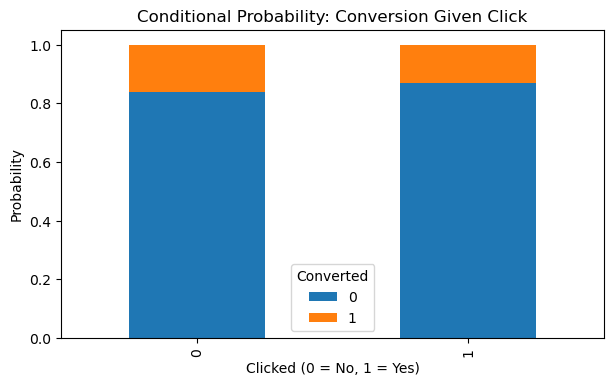

In [12]:
conditional_prob_table.plot(
    kind="bar",
    stacked=True,
    figsize=(7,4)
)
plt.title("Conditional Probability: Conversion Given Click")
plt.xlabel("Clicked (0 = No, 1 = Yes)")
plt.ylabel("Probability")
plt.legend(title="Converted")
plt.show()

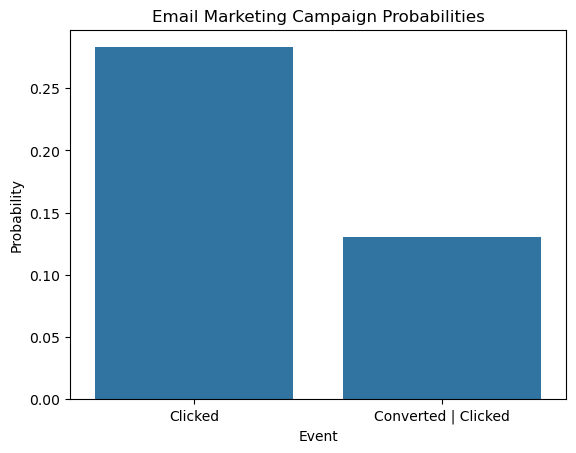

In [13]:
prob_df = pd.DataFrame({
    "Event": ["Clicked", "Converted | Clicked"],
    "Probability": [p_click, p_convert_given_click]
})

sns.barplot(x="Event", y="Probability", data=prob_df)
plt.title("Email Marketing Campaign Probabilities")
plt.show()